In [21]:
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# example input
#n = 1000
#k = 9 
#p = 19/38.0

In [42]:
def calc_prop(n, k, p, verbose=0):
    """
    This function calculate the probability of the happening of a consecutive loss within a number of experiment/game
    to demonstrate Gambler's ruin using Matringale betting system.
    
    Args:
        n (int): number of experiment/game
        k (int): number of consecutive loss
        p (double): probability of loss
        
    Returns:
        double: probability of consecutive loss occurs within the number of experiment/game
    """
    r = [0] * (n+1)
    r[k] = p**k
    for i in range(k+1,n+1):
      r[i] = r[i-1] + (1-p)*(p**k)*(1-r[i-k-1])
    if verbose > 0:
        print("win probability: {:.2f}, number of experiment: {}, probability: {:.4f}".format(1-p,n,r[-1]))
    return r[-1]

win probability: 0.60, number of experiment: 100, probability: 0.0145
win probability: 0.60, number of experiment: 500, probability: 0.0747
win probability: 0.60, number of experiment: 1000, probability: 0.1448
win probability: 0.60, number of experiment: 1500, probability: 0.2095
win probability: 0.60, number of experiment: 3000, probability: 0.3759
win probability: 0.60, number of experiment: 5000, probability: 0.5445
win probability: 0.60, number of experiment: 10000, probability: 0.7928
win probability: 0.55, number of experiment: 100, probability: 0.0380
win probability: 0.55, number of experiment: 500, probability: 0.1861
win probability: 0.55, number of experiment: 1000, probability: 0.3395
win probability: 0.55, number of experiment: 1500, probability: 0.4641
win probability: 0.55, number of experiment: 3000, probability: 0.7136
win probability: 0.55, number of experiment: 5000, probability: 0.8758
win probability: 0.55, number of experiment: 10000, probability: 0.9846
win prob

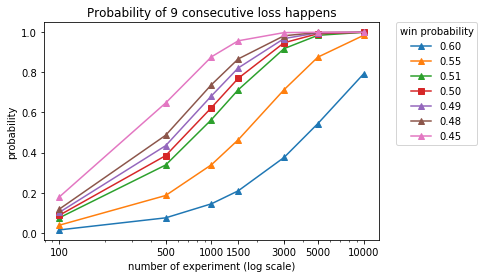

In [43]:
ns = [100, 500, 1000, 1500, 3000, 5000, 10000]
ps = [0.4, 0.45, 0.49, 0.5, 0.51, 0.52, 0.55]
k = 9
# ns = [10,20]
# ps = [0.45, 0.5]

for p in ps:
    results = [calc_prop(n, k, p, 1) for n in ns]
    marker = 's-' if p == 0.5 else '^-'
    plt.plot(ns,results,marker,label="{0:.2f}".format(1-p))
plt.xscale('log')
plt.xticks(ns)
plt.gca().get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel("number of experiment (log scale)")
plt.ylabel("probability")
plt.title("Probability of {} consecutive loss happens".format(k))
plt.legend(title="win probability",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        